In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
athletes = pd.read_csv("data/athlete_events.csv")
regions = pd.read_csv("data/noc_regions.csv")

In [5]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
df = pd.merge(athletes, regions, on = "NOC")

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [9]:
df.duplicated().sum()

1385

In [11]:
df.shape

(270767, 17)

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(269382, 17)

In [19]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region        21
notes     264347
dtype: int64

In [3]:
df["Medal"].unique()

NameError: name 'df' is not defined

In [5]:
df["Medal"].fillna("No_medal", inplace = True)

In [20]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No_medal,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No_medal,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No_medal,China,NaN


In [7]:
df["Season"].value_counts()

Season
Summer    222203
Winter     48564
Name: count, dtype: int64

In [5]:
summer = df[df["Season"]=="Summer"]
winter = df[df["Season"]=="Winter"]

In [23]:
summer.shape

(220818, 17)

In [24]:
winter.shape

(48564, 17)

In [1]:
##Seasonwise medal tally

In [7]:
medal_count_summer = summer.groupby(["NOC","Medal"]).size().reset_index(name="count")
medal_count_summer

,NOC,Medal,count
0,AFG,Bronze,2
1,AHO,Silver,1
2,ALG,Bronze,8
3,ALG,Gold,5
4,ALG,Silver,4
...,...,...,...
350,ZAM,Bronze,1
351,ZAM,Silver,1
352,ZIM,Bronze,1
353,ZIM,Gold,17


In [8]:
medal_pivot_summer = medal_count_summer.pivot(index="NOC", columns="Medal", values="count").fillna(0)
medal_pivot_summer

Medal,Bronze,Gold,Silver
NOC,,,
AFG,2.0,0.0,0.0
AHO,0.0,0.0,1.0
ALG,8.0,5.0,4.0
ANZ,5.0,20.0,4.0
ARG,91.0,91.0,92.0
...,...,...,...
VIE,0.0,1.0,3.0
WIF,5.0,0.0,0.0
YUG,92.0,130.0,161.0


In [9]:
medal_pivot_summer = medal_pivot_summer.astype(int)
medal_pivot_summer

Medal,Bronze,Gold,Silver
NOC,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,4
ANZ,5,20,4
ARG,91,91,92
...,...,...,...
VIE,0,1,3
WIF,5,0,0
YUG,92,130,161


In [10]:
medal_pivot_summer["Total Medal"]=medal_pivot_summer[["Gold", "Silver", "Bronze"]].sum(axis=1)
medal_pivot_summer

Medal,Bronze,Gold,Silver,Total Medal
NOC,,,,
AFG,2,0,0,2
AHO,0,0,1,1
ALG,8,5,4,17
ANZ,5,20,4,29
ARG,91,91,92,274
...,...,...,...,...
VIE,0,1,3,4
WIF,5,0,0,5
YUG,92,130,161,383


In [11]:
medal_pivot_summer.sort_values(by=["Gold","Silver", "Bronze"], ascending=False).head(30)

Medal,Bronze,Gold,Silver,Total Medal
NOC,,,,
USA,1197,2472,1333,5002
URS,596,832,635,2063
GBR,620,636,729,1985
GER,649,592,538,1779
ITA,454,518,474,1446
FRA,587,465,575,1627
HUN,363,432,328,1123
SWE,358,354,396,1108
AUS,510,342,452,1304


In [12]:
summer=summer.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event"])
summer.shape

(98657, 17)

In [13]:
winter=winter.drop_duplicates(subset=["Team", "NOC", "Games", "Year", "City", "Sport", "Event"])
winter.shape

(16956, 17)

In [14]:
medal_counts_winter = winter.groupby(["NOC", "Medal"]).size().reset_index(name="count")

In [15]:
medal_pivot_winter = medal_counts_winter.pivot(index="NOC", columns="Medal", values="count").fillna(0)

In [16]:
medal_pivot_winter = medal_pivot_winter.astype(int)

In [17]:
medal_pivot_winter["Total Medal"]=medal_pivot_winter[["Gold", "Silver", "Bronze"]].sum(axis=1)

In [15]:
medal_pivot_winter.sort_values(by=["Gold","Silver", "Bronze"], ascending=False).head(30)

Medal,Bronze,Gold,Silver,Total Medal
NOC,,,,
NOR,48,58,43,149
URS,24,46,24,94
CAN,25,43,34,102
USA,44,39,48,131
GER,36,39,38,113
RUS,21,28,22,71
SWE,31,23,22,76
AUT,24,21,31,76
ITA,25,19,17,61


In [18]:
def fetch_noc(noc,pivot_table):
    if noc in pivot_table.index:
        details={
            "Gold" : pivot_table.loc[noc, "Gold"],
            "Silver" : pivot_table.loc[noc, "Silver"],
            "Bronze" : pivot_table.loc[noc, "Bronze"],\
            "Total Medal" : pivot_table.loc[noc, "Total Medal"],
        }
        return deatils
    else:
        print("No NOC exists")

In [20]:
fetch_noc("AFG", medal_pivot_winter)

No NOC exists


In [21]:
medal_pivot_summer["Total Medal"]=medal_pivot_summer[["Gold", "Silver", "Bronze"]].sum(axis=1)
medal_pivot_summer

Medal,Bronze,Gold,No_medal,Silver,Total Medal
NOC,,,,,
AFG,2,0,124,0,2
AHO,0,0,73,1,1
ALB,0,0,63,0,0
ALG,8,5,522,4,17
AND,0,0,53,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,92,130,1663,161,383


In [24]:
def fetch_noc(noc,pivot_table):
    if noc in pivot_table.index:
        details={
            "Gold" : pivot_table.loc[noc, "Gold"],
            "Silver" : pivot_table.loc[noc, "Silver"],
            "Bronze" : pivot_table.loc[noc, "Bronze"],\
            "Total Medal" : pivot_table.loc[noc, "Total Medal"],
        }
        return details
    else:
        print("No NOC exists")

In [25]:
fetch_noc("AFG", medal_pivot_summer)

{'Gold': 0, 'Silver': 0, 'Bronze': 2, 'Total Medal': 2}

In [26]:
fetch_noc("ARA", medal_pivot_summer)

No NOC exists


In [27]:
fetch_noc("IND", medal_pivot_summer)

{'Gold': 131, 'Silver': 19, 'Bronze': 40, 'Total Medal': 190}

In [28]:
fetch_noc("USA", medal_pivot_summer)

{'Gold': 2472, 'Silver': 1333, 'Bronze': 1197, 'Total Medal': 5002}

In [30]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No_medal,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No_medal,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No_medal,China,NaN


summer.shape

In [31]:
summer.shape

(98657, 17)

In [20]:
summer.isnull().sum()

ID            0
Name          0
Sex           0
Age        3118
Height    17823
Weight    18180
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     87245
region        0
notes     96593
dtype: int64

In [19]:
summer.dropna(subset=["region"], inplace=True)

In [52]:
medals_count = summer.groupby(["Year", "region","Sport", "Medal"]).size().unstack(fill_value=0)
medals_count

Medal                         Bronze  Gold  Silver
Year region     Sport                             
1896 Australia  Athletics          0     2       0
                Tennis             1     0       0
     Austria    Cycling            2     1       0
                Swimming           0     1       1
     Denmark    Fencing            1     0       0
...                              ...   ...     ...
2016 Tajikistan Athletics          0     1       0
     Grenada    Athletics          0     0       1
     Fiji       Rugby Sevens       0     1       0
     Jordan     Taekwondo          0     1       0
     Kosovo     Judo               0     1       0

[5217 rows x 3 columns]

In [53]:
medals_count = medals_count.reset_index()
medals_count

Medal,Year,region,Sport,Bronze,Gold,Silver
0,1896,Australia,Athletics,0,2,0
1,1896,Australia,Tennis,1,0,0
2,1896,Austria,Cycling,2,1,0
3,1896,Austria,Swimming,0,1,1
4,1896,Denmark,Fencing,1,0,0
...,...,...,...,...,...,...
5212,2016,Tajikistan,Athletics,0,1,0
5213,2016,Grenada,Athletics,0,0,1
5214,2016,Fiji,Rugby Sevens,0,1,0
5215,2016,Jordan,Taekwondo,0,1,0


In [54]:
medals_count["Total Medal"] = medals_count["Gold"] + medals_count["Silver"] + medals_count["Bronze"]
medals_count

Medal,Year,region,Sport,Bronze,Gold,Silver,Total Medal
0,1896,Australia,Athletics,0,2,0,2
1,1896,Australia,Tennis,1,0,0,1
2,1896,Austria,Cycling,2,1,0,3
3,1896,Austria,Swimming,0,1,1,2
4,1896,Denmark,Fencing,1,0,0,1
...,...,...,...,...,...,...,...
5212,2016,Tajikistan,Athletics,0,1,0,1
5213,2016,Grenada,Athletics,0,0,1,1
5214,2016,Fiji,Rugby Sevens,0,1,0,1
5215,2016,Jordan,Taekwondo,0,1,0,1


In [32]:
def plot_medals(year, country, df):
    filtered_df = df[(df["Year"]==year) & (df["region"]==country)]
    gold = filtered_df["Gold"].values[0]
    bronze = filtered_df["Bronze"].values[0]
    silver = filtered_df["Silver"].values[0]
    total_medal = filtered_df["Total Medal"].values[0]
    
    fig,ax = plt.subplots()
    medals=["Gold", "Silver", "Bronze", "Total Medal"]
    counts = [gold, silver, bronze, total_medal]
    ax.bar(medals, counts, color=["gold", "silver", "brown", "green"])
    plt.show()

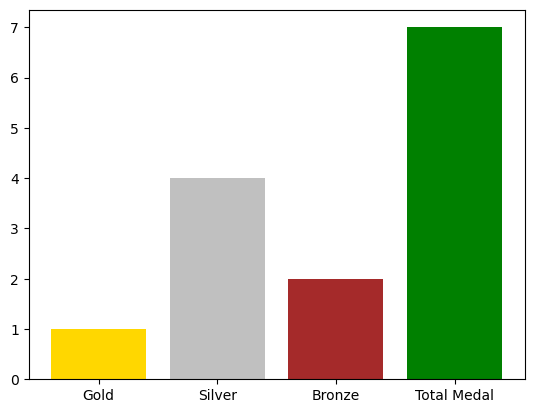

In [34]:
plot_medals(1896, "France", medals_count)

In [40]:
def plot_year_progress(country, df):
    filtered_df = df[df["region"]==country]
    fig,ax = plt.subplots()
    ax.plot(filtered_df["Year"], filtered_df["Gold"], color="gold", label="GOLD", marker="o", linestyle="-")
    ax.plot(filtered_df["Year"], filtered_df["Silver"], color="silver", label="SILVER", marker="o", linestyle="-")
    ax.plot(filtered_df["Year"], filtered_df["Bronze"], color="brown", label="BRONZE", marker="o", linestyle="-")
    ax.plot(filtered_df["Year"], filtered_df["Total Medal"], color="green", label="TOTAL MEDAL", marker="o", linestyle="-")
    ax.legend()
    plt.show()

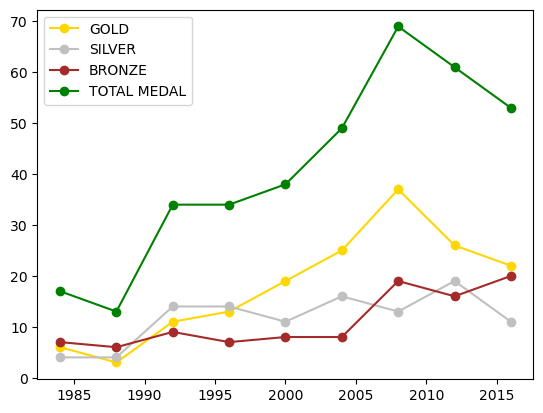

In [41]:
plot_year_progress("China", medals_count)